In [1]:
import numpy as np
import pandas as pd
import string
import sys
import os
from os import listdir
import unicodedata

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [29]:
pd.set_option('display.max_columns', None)

In [21]:
from os import listdir
from os.path import isfile, join
files = [f for f in listdir('../data/') if isfile(join('../data/', f))]

In [22]:
dirs = [f for f in listdir('../data/') if len(f) > 20]

In [23]:
dirs

['Engineering_Village_abstract_5-30-2020_182221741.csv',
 'Engineering_Village_abstract_5-30-2020_183128807.csv',
 'Engineering_Village_abstract_5-30-2020_181849391.csv',
 'Engineering_Village_abstract_5-30-2020_181924341.csv',
 'Engineering_Village_abstract_5-30-2020_182257830.csv',
 'Engineering_Village_abstract_5-30-2020_191525912.csv',
 'Engineering_Village_abstract_5-30-2020_18281597.csv',
 'Engineering_Village_abstract_5-30-2020_184340343.csv',
 'Engineering_Village_abstract_5-30-2020_191633980.csv',
 'Engineering_Village_abstract_5-30-2020_184044448.csv',
 'Engineering_Village_abstract_5-30-2020_184234707.csv',
 'Engineering_Village_abstract_5-30-2020_181129657.csv',
 'Engineering_Village_abstract_5-30-2020_183915580.csv',
 'Engineering_Village_abstract_5-30-2020_191357341.csv',
 'Engineering_Village_abstract_5-30-2020_18181768.csv',
 'Engineering_Village_abstract_5-30-2020_181956151.csv',
 'Engineering_Village_abstract_5-30-2020_19196565.csv',
 'Engineering_Village_abstract_5-3

In [24]:
frames = [ pd.read_csv('../data/{}'.format(f),error_bad_lines=False) for f in dirs]
df = pd.concat(frames)

b'Skipping line 6: expected 27 fields, saw 34\nSkipping line 14: expected 27 fields, saw 28\nSkipping line 24: expected 27 fields, saw 28\nSkipping line 39: expected 27 fields, saw 31\nSkipping line 49: expected 27 fields, saw 31\nSkipping line 61: expected 27 fields, saw 32\nSkipping line 64: expected 27 fields, saw 29\nSkipping line 66: expected 27 fields, saw 31\nSkipping line 69: expected 27 fields, saw 28\nSkipping line 73: expected 27 fields, saw 31\nSkipping line 74: expected 27 fields, saw 31\nSkipping line 76: expected 27 fields, saw 52\nSkipping line 97: expected 27 fields, saw 28\nSkipping line 101: expected 27 fields, saw 28\nSkipping line 149: expected 27 fields, saw 29\nSkipping line 153: expected 27 fields, saw 28\nSkipping line 154: expected 27 fields, saw 30\nSkipping line 158: expected 27 fields, saw 30\nSkipping line 175: expected 27 fields, saw 30\nSkipping line 189: expected 27 fields, saw 31\nSkipping line 193: expected 27 fields, saw 32\nSkipping line 196: expect

b'Skipping line 20: expected 23 fields, saw 26\nSkipping line 21: expected 23 fields, saw 26\nSkipping line 46: expected 23 fields, saw 31\nSkipping line 60: expected 23 fields, saw 26\nSkipping line 129: expected 23 fields, saw 25\nSkipping line 133: expected 23 fields, saw 26\nSkipping line 179: expected 23 fields, saw 26\nSkipping line 182: expected 23 fields, saw 25\nSkipping line 201: expected 23 fields, saw 24\nSkipping line 226: expected 23 fields, saw 25\nSkipping line 242: expected 23 fields, saw 26\nSkipping line 248: expected 23 fields, saw 29\nSkipping line 256: expected 23 fields, saw 24\nSkipping line 260: expected 23 fields, saw 32\nSkipping line 261: expected 23 fields, saw 30\nSkipping line 281: expected 23 fields, saw 24\nSkipping line 285: expected 23 fields, saw 24\nSkipping line 286: expected 23 fields, saw 24\nSkipping line 296: expected 23 fields, saw 24\nSkipping line 320: expected 23 fields, saw 25\nSkipping line 350: expected 23 fields, saw 24\nSkipping line 3

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11220 entries, 0 to 92
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Title                     11220 non-null  object 
 1   Author                    11216 non-null  object 
 2   Author affiliation        11192 non-null  object 
 3   Source                    11220 non-null  object 
 4   Publisher                 11220 non-null  object 
 5   Volume and Issue          11219 non-null  object 
 6   Pages                     9931 non-null   object 
 7   Issue date                11220 non-null  object 
 8   Monograph title           71 non-null     object 
 9   Publication year          11220 non-null  int64  
 10  ISSN                      11220 non-null  object 
 11  E-ISSN                    5707 non-null   float64
 12  DOI                       11216 non-null  object 
 13  Article number            1398 non-null   object 
 14  Abstract 

for f in dirs:
    
    df = pd.read_csv('data/{}'.format(f),error_bad_lines=False)
    df = df[['Title','Author','Abstract']]
    print (df.columns.values)

In [48]:
abstract_df = df['Abstract']

In [51]:
sum(abstract_df != abstract_df)

219

In [57]:
abstract_df = abstract_df.dropna()

In [53]:
def remove_accents(input_str):
    """
    remove accents for an input_str
    return str
    """
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    only_ascii = nfkd_form.encode('ASCII', 'ignore')
    return only_ascii.decode()

In [54]:
def cleanText(wordSeries):
    tbl = dict.fromkeys(i for i in range(sys.maxunicode)
                        if unicodedata.category(chr(i)).startswith('P'))

    def remove_accents(input_str):
        nfkd_form = unicodedata.normalize('NFKD', input_str)
        only_ascii = nfkd_form.encode('ASCII', 'ignore')
        return only_ascii.decode()

    def remove_punctuation(text):
        return text.translate(tbl)

    # remove punctuation
    wordSeries = wordSeries.apply(lambda x: remove_punctuation(x))
    wordSeries = wordSeries.apply(lambda x: ''.join([i for i in x if not i.isdigit()]))  #remove digits
    wordSeries = wordSeries.apply(lambda x: x.lower())#lower cases
    wordSeries = wordSeries.apply(lambda x: x.replace('<br >', ' '))#remove html
    wordSeries = wordSeries.apply(lambda x: x.replace('<br>', ' '))#remove html
    wordSeries = wordSeries.apply(lambda x: x.replace('\n', ' '))#remove html
    wordSeries = wordSeries.apply(lambda x: x.replace('\n\n', ' '))
    wordSeries = wordSeries.apply(lambda x: x.replace('$', ' '))
    wordSeries = wordSeries.apply(lambda x: x.replace('>', ' '))
    wordSeries = wordSeries.apply(lambda x: remove_accents(x))
    wordSeries = wordSeries.apply(lambda x: x.replace('`', ''))#remove extra punctuation
    # wordSeries = wordSeries.apply(lambda x: x.replace(' id ', ' '))
    return wordSeries

In [58]:
abs_clean = cleanText(abstract_df)

In [59]:
def tokenize(documents, stopwords):
    """
    Input: Array of documents

    Remove stopwords, html, punctuation, digits
    Tokenize each document
    Lemmatize tokens for each document

    Return: Array of tokenized documents
    """
    documents = cleanText(documents)
    docs = [word_tokenize(content) for content in documents] #tokenize row by row
    stopwords_=set(stopwords.words('english'))
    punctuation_ = set(string.punctuation)
    def filter_tokens(sent):
        return([w for w in sent if not w in stopwords_ and not w in punctuation_]) #remove stopword
    docs = list(map(filter_tokens,docs))
    lemmatizer = WordNetLemmatizer()
    docs_lemma = [[lemmatizer.lemmatize(word) for word in words] for words in docs]
    return docs_lemma

In [60]:
tokens = tokenize(abs_clean,stopwords)

In [61]:
import operator
def wordCounter(tokens):
    """Take array of tokenized documents
    Get sorted word counts dict
    """
    words = {}
    for row in tokens:
        for word in row:
            if word in words:
                words[word] += 1
            else:
                words[word] = 1

    sorted_d = dict(sorted(words.items(),
                           key=operator.itemgetter(1),
                           reverse=True))
    return sorted_d

In [62]:
count = wordCounter(tokens)
count 

{'seismic': 19242,
 'model': 12229,
 'earthquake': 12117,
 'building': 10778,
 'response': 10384,
 'analysis': 10201,
 'result': 9727,
 'structure': 9130,
 'ground': 8019,
 'motion': 7578,
 'study': 7523,
 'system': 7357,
 'damage': 7074,
 'design': 7059,
 'method': 6589,
 'effect': 6229,
 'using': 6172,
 'paper': 5748,
 'proposed': 5637,
 'wall': 5601,
 'used': 5323,
 'soil': 5317,
 'structural': 5279,
 'test': 5192,
 'different': 5161,
 'performance': 5141,
 'dynamic': 4987,
 'shear': 4806,
 'based': 4721,
 'frame': 4413,
 'nonlinear': 4231,
 'parameter': 4218,
 'medium': 4206,
 'elsevier': 4109,
 'ltd': 4104,
 'springer': 4103,
 'two': 4064,
 'displacement': 3937,
 'bridge': 3866,
 'site': 3833,
 'concrete': 3765,
 'ratio': 3764,
 'science+business': 3635,
 'also': 3601,
 'approach': 3594,
 'behavior': 3584,
 'data': 3530,
 'column': 3507,
 'level': 3397,
 'element': 3342,
 'numerical': 3263,
 'capacity': 3259,
 'steel': 3167,
 'acceleration': 3105,
 'experimental': 3103,
 'procedur

In [63]:
bow = count.keys()

In [64]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image

In [65]:
def plotWordCloud(ax, bow, title='Word Cloud'):
    # ax.figure(figsize=(20, 10))
    wc = WordCloud(background_color="white",
                   width=1000,
                   height=1000,
                   max_words=100,
                   relative_scaling=0.5,
                   normalize_plurals=False).generate_from_frequencies(bow)
    ax.grid(False)
    ax.set_title(title, size=36)
    ax.axis('off')
    ax.imshow(wc)

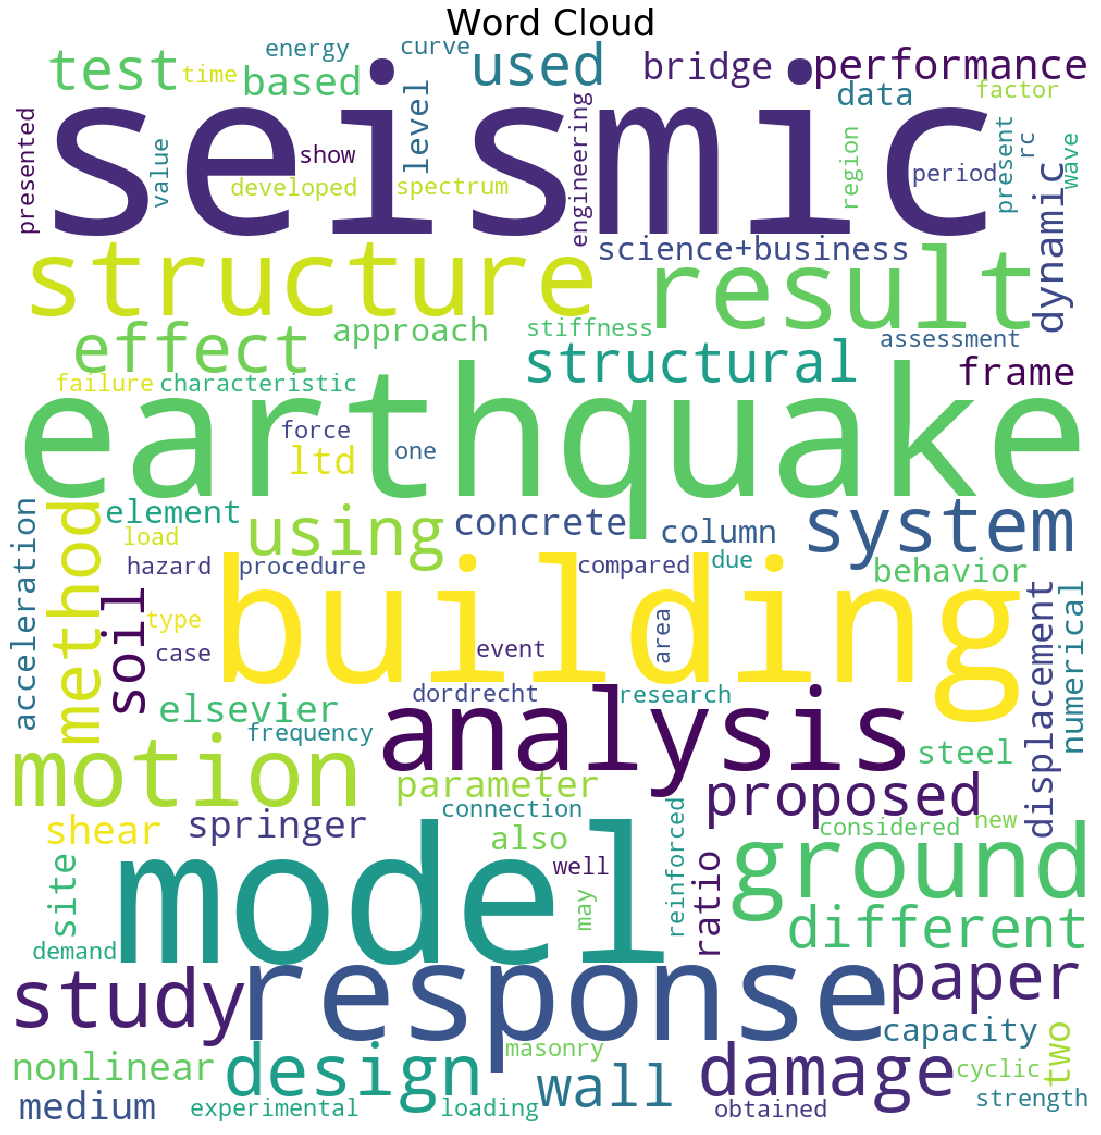

In [66]:
fig, ax = plt.subplots(figsize = (20,20))
plotWordCloud(ax,count)
plt.savefig('../img/wordcloud.png')